### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 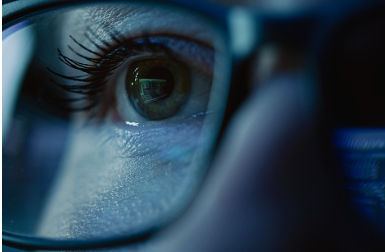 



In [1]:
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Defining the paths
zip_file_path = 'C:/users/game/glasses.zip'
extract_dir = 'C:/users/game/extracted_images'


In [3]:
# Extracting the zip file 
if not os.path.exists(extract_dir):
    with zipfile.ZipFile("glasses.zip", 'r') as zip_ref:
        zip_ref.extractall(extract_dir)


In [4]:
train_dir = os.path.join(extract_dir, 'glasses/glasses')  
test_dir = os.path.join(extract_dir, 'glasses/no_glasses')  

# Checking if the directories exist and containing files
print(f"Checking directory: {train_dir}")
print("Files:", os.listdir(train_dir))

print(f"Checking directory: {test_dir}")
print("Files:", os.listdir(test_dir))

Checking directory: C:/users/game/extracted_images\glasses/glasses
Files: ['face-1046.jpg', 'face-1141.jpg', 'face-1147.jpg', 'face-1154.jpg', 'face-1213.jpg', 'face-1315.jpg', 'face-133.jpg', 'face-1382.jpg', 'face-1410.jpg', 'face-149.jpg', 'face-1630.jpg', 'face-1744.jpg', 'face-1748.jpg', 'face-175.jpg', 'face-1815.jpg', 'face-1892.jpg', 'face-1910.jpg', 'face-1947.jpg', 'face-2034.jpg', 'face-2130.jpg', 'face-219.jpg', 'face-2208.jpg', 'face-2281.jpg', 'face-2293.jpg', 'face-2367.jpg', 'face-2370.jpg', 'face-2424.jpg', 'face-2446.jpg', 'face-2469.jpg', 'face-2489.jpg', 'face-2552.jpg', 'face-2597.jpg', 'face-2701.jpg', 'face-275.jpg', 'face-284.jpg', 'face-2848.jpg', 'face-2981.jpg', 'face-3043.jpg', 'face-3174.jpg', 'face-3201.jpg', 'face-3283.jpg', 'face-3306.jpg', 'face-3407.jpg', 'face-3514.jpg', 'face-3672.jpg', 'face-3788.jpg', 'face-3856.jpg', 'face-4084.jpg', 'face-4270.jpg', 'face-4544.jpg', 'face-4628.jpg', 'face-4901.jpg', 'face-520.jpg', 'face-699.jpg', 'face-735.jpg',

In [5]:
# Data augmentation and loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Checking train generator details
print("Train Generator:")
print(f"Number of batches: {train_generator.samples // train_generator.batch_size}")
print(f"Batch size: {train_generator.batch_size}")
print(f"Class labels: {train_generator.class_indices}")

# Checking test generator details
print("Test Generator:")
print(f"Number of batches: {test_generator.samples // test_generator.batch_size}")
print(f"Batch size: {test_generator.batch_size}")
print(f"Class labels: {test_generator.class_indices}")

# Building and compiling the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Evaluating the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Train Generator:
Number of batches: 0
Batch size: 32
Class labels: {}
Test Generator:
Number of batches: 0
Batch size: 32
Class labels: {}


E:\game user files\Python Anaconda download\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Must provide at least one structure

In [6]:
# Making predictions on test data
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

# Converting predictions to class labels
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Visualizing some predictions
plt.figure(figsize=(12, 8))
for i in range(min(5, len(test_images))):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {'Glasses' if predicted_classes[i] == 1 else 'No Glasses'}")
    plt.axis('off')
plt.show()

E:\game user files\Python Anaconda download\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


ValueError: math domain error

In [7]:
pip install numpy pandas scikit-learn pillow tensorflow


In [8]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Defining paths
base_dir = 'C:/users/game/extracted_images'
glasses_dir = os.path.join(base_dir, 'glasses', 'glasses')
no_glasses_dir = os.path.join(base_dir, 'glasses', 'no_glasses')

# Loading the images
def load_images_from_folder(folder, label, img_size=(150, 150)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).convert('RGB')
        img = img.resize(img_size)
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

# Loading thedata
glasses_images, glasses_labels = load_images_from_folder(glasses_dir, 1)
no_glasses_images, no_glasses_labels = load_images_from_folder(no_glasses_dir, 0)

# Combining the datasets
all_images = glasses_images + no_glasses_images
all_labels = glasses_labels + no_glasses_labels

# Converting  to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Normalizing all images
all_images = all_images / 255.0

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Defining CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluateng  the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/15


E:\game user files\Python Anaconda download\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 826ms/step - accuracy: 0.8408 - loss: 0.7746 - val_accuracy: 0.9286 - val_loss: 0.3241
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step - accuracy: 0.8304 - loss: 0.6125 - val_accuracy: 0.9286 - val_loss: 0.4413
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - accuracy: 0.8199 - loss: 0.5190 - val_accuracy: 0.9286 - val_loss: 0.3900
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 449ms/step - accuracy: 0.8199 - loss: 0.4649 - val_accuracy: 0.9286 - val_loss: 0.2791
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - accuracy: 0.8304 - loss: 0.4444 - val_accuracy: 0.9286 - val_loss: 0.2773
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - accuracy: 0.8616 - loss: 0.3988 - val_accuracy: 0.9286 - val_loss: 0.2792
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 478ms/step - accuracy: 0.8408 - loss: 0.4059 - val_accuracy: 0.9286 - val_loss: 0.3545
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - accuracy: 0.8304 - loss: 0.4297 - val_accuracy: 0.9286 - val_loss: 0.3344
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


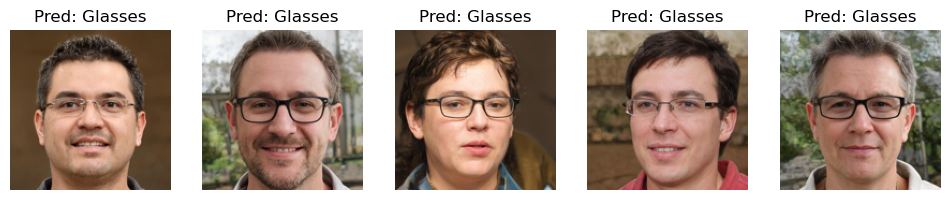

In [9]:
# Making predictions on the test set
predictions = model.predict(X_test)

# Converting predictions to class labels
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Plotting some sample images with predictions
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {'Glasses' if predicted_classes[i] == 1 else 'No Glasses'}")
    plt.axis('off')
plt.show()

In [11]:
# Filtering indices for "No Glasses" predictions
no_glasses_indices = np.where(predicted_classes == 0)[0]

# Plotting some sample images classified as "No Glasses"
plt.figure(figsize=(12, 8))
num_samples = min(5, len(no_glasses_indices))  
for i in range(num_samples):
    idx = no_glasses_indices[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx])
    plt.title("No Glasses")
    plt.axis('off')
plt.show()

<Figure size 1200x800 with 0 Axes>

In [12]:

# Making the predictions on the test set
predictions = model.predict(X_test)

# Converting predictions to class labels
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Filtering indices for "No Glasses" predictions
no_glasses_indices = np.where(predicted_classes == 0)[0]

# Plotting some sample images classified as "No Glasses"
plt.figure(figsize=(12, 8))
num_samples = min(5, len(no_glasses_indices))  
for i in range(num_samples):
    idx = no_glasses_indices[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx])
    plt.title("No Glasses")
    plt.axis('off')
plt.tight_layout()  
plt.show()  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


<Figure size 1200x800 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Makig predictions on the test set
predictions = model.predict(X_test)

# Converting the predictions to class labels
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Filtering indices for "No Glasses" predictions
no_glasses_indices = np.where(predicted_classes == 0)[0]

# Plotting some sample images classified as "No Glasses"
plt.figure(figsize=(12, 8))
num_samples = min(5, len(no_glasses_indices))  
for i in range(num_samples):
    idx = no_glasses_indices[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx]) 
    plt.title("No Glasses")
    plt.axis('off')  
plt.tight_layout()  
plt.show()  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


<Figure size 1200x800 with 0 Axes>

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9286 - loss: 0.2626
Test Loss: 0.2625836431980133
Test Accuracy: 0.9285714030265808


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


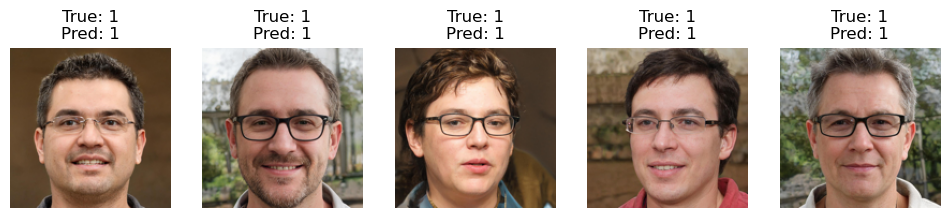

In [16]:
import matplotlib.pyplot as plt

# Predictiing the classes
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Visualizeing some predictions
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"True: {y_test[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.show()


In [17]:
# Taking a random threshold
threshold = 0.3  
predicted_classes = (predictions > threshold).astype(int).flatten()

# Checking the distribution again
unique, counts = np.unique(predicted_classes, return_counts=True)
print(f'Class distribution with threshold {threshold}: {dict(zip(unique, counts))}')


Class distribution with threshold 0.3: {1: 14}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


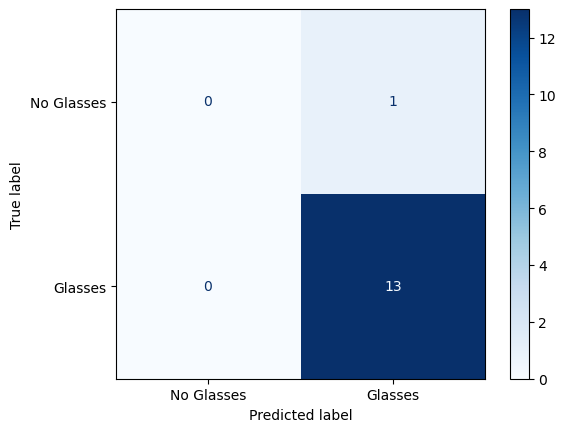

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Glasses', 'Glasses'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [19]:
print("Unique labels in test set:", np.unique(y_test))


Unique labels in test set: [0 1]


In [20]:
sample_indices = np.random.choice(range(len(X_test)), 10, replace=False)
for idx in sample_indices:
    print(f'Index: {idx}, Label: {y_test[idx]}, Predicted Class: {predicted_classes[idx]}')


Index: 9, Label: 1, Predicted Class: 1
Index: 4, Label: 1, Predicted Class: 1
Index: 2, Label: 1, Predicted Class: 1
Index: 6, Label: 1, Predicted Class: 1
Index: 7, Label: 1, Predicted Class: 1
Index: 12, Label: 0, Predicted Class: 1
Index: 0, Label: 1, Predicted Class: 1
Index: 13, Label: 1, Predicted Class: 1
Index: 5, Label: 1, Predicted Class: 1
Index: 1, Label: 1, Predicted Class: 1


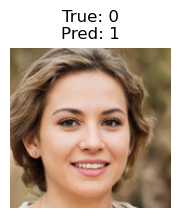

In [21]:
new_indices = [i for i in range(len(X_test)) if y_test[i] != predicted_classes[i]]

# Displaying the first 5  images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(new_indices[:5]):  
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_test[idx]}\nPred: {predicted_classes[idx]}")
    plt.axis('off')
plt.show()


In [ ]:
The CNN model has different parameters such as The number of filters in a Conv2D layer dictates the variety of features it can detect.the activation function  ReLU injects non-linearity, enabling the model to recognize complex patterns. ReLU, commonly used in CNNs, facilitates efficient training by alleviating the vanishing gradient issue
Pooling layers like MaxPooling downsample the feature maps it preservs the essential features while reducing computational complexity. 
They retain important features by selecting the maximum value within each feature blocks. 
One epoch represents a single entry through the entire training dataset. 
Additional extra epochs enhance learning but may cause to overfitting.
A batch size of 32 balances frequent weight updates and training stability.
Training the model for 15 epochs means it had effective learning, by giving consistent accuracy, without signs of overfitting.
    



